In [1]:
import sys; sys.path.append('../')

In [2]:
open_ai_api= open("../openai_api_key.key", "r").read()
from agents import Agent, OpenAIChatGPT, set_global_llm, set_live_verbosity

set_live_verbosity(2)
openai_llm = OpenAIChatGPT(
    api_key=open_ai_api,
    model="gpt-4o-mini",
    temperature=0.7,
    top_p=0.9,
    max_tokens=2000
)

set_global_llm(openai_llm)

/Users/voldemort/Desktop/personal_projects/arc-mlu/notebooks/../notebooks/arc_helper.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


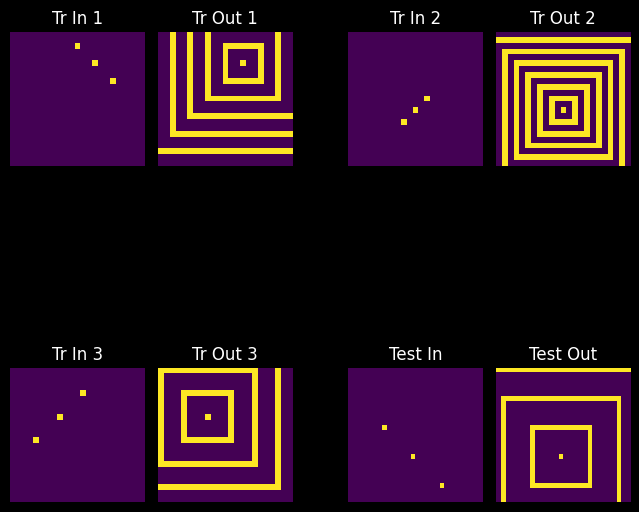

In [3]:
from notebooks.arc_helper import (convert_json_format, generate_string,
                                  plot_sample_matrices)

directory = "./ARC-800-tasks/training"  # Change this to your actual directory path
converted_data = convert_json_format(directory)
data=generate_string(converted_data)
plot_sample_matrices(converted_data[4])

In [4]:
from mlu import MLU

mlu = MLU(main_role="""
                    The goal is to construct the output grid(s) corresponding to the test input grid(s), 
                    using 3 trials for each test input. 'Constructing the output grid' involves picking 
                    the height and width of the output grid, then filling each cell in the grid with a symbol 
                    (integer between 0 and 9, which are visualized as colors). Learn to figure out the 
                    transformation rules and logic of image(matrix) from few given examples and apply it 
                    to the final test image(matrix). Analyze the given examples and predict the final 
                    image(matrix) for the given test image(matrix) and understand how to learn the 
                    transformation rules and logic of image(matrix) from few given examples to apply it 
                    to the final test image(matrix).
                    """,
    collection_name="knowledge_base_v-0.1",
    compress_knowledge=True,
    retrival_limit=15,
)

/opt/homebrew/Caskroom/miniconda/base/envs/voice-clone/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange



Starting Epoch 1



Training:   0%|          | 0/20 [00:00<?, ?it/s]

Pruned 15 old entries and added 6 new entries.


Delete of nonexisting embedding ID: ed6948b6-7182-4bc4-b40f-85ff68c8d195
Delete of nonexisting embedding ID: 8e48e149-f6f9-4a4a-9a3f-3bc04b278308
Delete of nonexisting embedding ID: b903d0c2-e8f1-4902-9250-359ea42135cd
Delete of nonexisting embedding ID: 98d96b4f-ae9c-4039-8219-422377b07140
Delete of nonexisting embedding ID: 1d854383-f1ff-46d3-bb1a-00f1fae6b60d
Delete of nonexisting embedding ID: be40308d-71c0-406e-be5e-60ebde15e8e1
Delete of nonexisting embedding ID: 3b8193f7-bad1-4314-888d-1017ae4f2247
Delete of nonexisting embedding ID: 65712619-73af-4ca3-8bb3-17547d0e2ded
Delete of nonexisting embedding ID: 6eef7cc7-20db-4ef4-9845-d2647aace277
Delete of nonexisting embedding ID: eb71db1a-748e-4d5c-a517-3c3eefbb0f8d
Delete of nonexisting embedding ID: fbe432fb-479d-48ad-b73f-b2c828ae71b0
Delete of nonexisting embedding ID: 5947a117-7352-4e4e-bb8a-4ff0891719e7
Delete of nonexisting embedding ID: 96f94121-ba89-431a-a16e-61bbecd56e23
Delete of nonexisting embedding ID: 15a9ee54-d9f3-4

Pruned 15 old entries and added 3 new entries.
DTW Score: 26.68332812825267


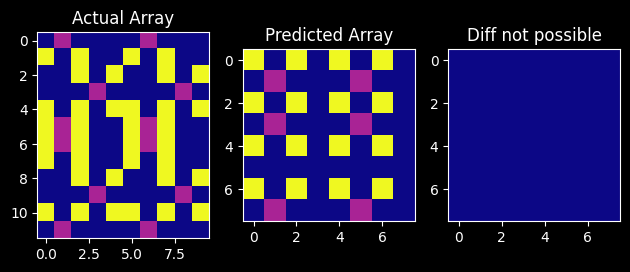

Training:   5%|▌         | 1/20 [01:13<23:18, 73.58s/it]

Pruned 15 old entries and added 8 new entries.


Delete of nonexisting embedding ID: 72432160-7d8e-4a5f-bb11-2c83cab02783
Delete of nonexisting embedding ID: b31c9992-5fe9-4a29-9c01-45e744ce29c3
Delete of nonexisting embedding ID: 87d1ab78-d1b2-4127-8d6e-9dd002d97548
Delete of nonexisting embedding ID: ce83fb5f-4d6a-442c-93e7-84a4cbb50721
Delete of nonexisting embedding ID: 380e0125-16cb-4a46-83fd-8996f12abe9c
Delete of nonexisting embedding ID: 342459f1-d930-4405-b631-6176d8644027
Delete of nonexisting embedding ID: 6b23c9b4-507e-43f7-9d09-8a221fc163d0
Delete of nonexisting embedding ID: 7e738354-0e24-4a8f-8de8-45d3d9e7a4e0
Delete of nonexisting embedding ID: 56c9a145-03ce-4a24-a3a5-3c8def527fff
Delete of nonexisting embedding ID: fca9934f-5ca0-4751-832d-c6de5cfce23f
Delete of nonexisting embedding ID: a1074b41-1b3a-498d-a805-26c54a9fa98c
Delete of nonexisting embedding ID: f70b084a-825e-499c-a7a0-74ac7d7fc9ac
Delete of nonexisting embedding ID: a56a7ae1-d444-44b7-a04e-262e5fefcc70
Delete of nonexisting embedding ID: 72432160-7d8e-4

Pruned 15 old entries and added 4 new entries.
DTW Score: 10.723805294763608


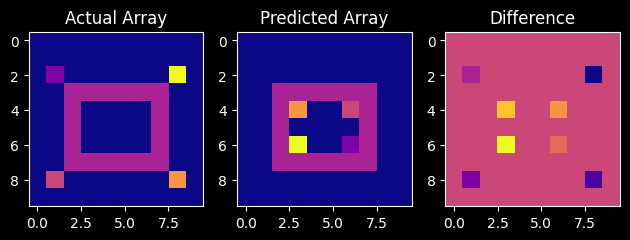

Training:  10%|█         | 2/20 [04:04<39:10, 130.57s/it]

Pruned 15 old entries and added 7 new entries.


Delete of nonexisting embedding ID: 6845c4a6-2382-47cd-abf7-0db830311926
Delete of nonexisting embedding ID: 775bfd3f-7e3b-40db-b688-ec436b0bb1dc
Delete of nonexisting embedding ID: f17ea866-074e-4962-a547-12bd367a966e
Delete of nonexisting embedding ID: 7f59c525-c659-4bdd-939a-7438761297a2
Delete of nonexisting embedding ID: ec9b83bc-abf3-4b6d-aaa8-6999fb5ec689
Delete of nonexisting embedding ID: e1aa7f56-3394-4896-ac4e-617dc4867004
Delete of nonexisting embedding ID: 9f556296-1848-44c1-8905-bc385c1d3225
Delete of nonexisting embedding ID: 06007d16-e2bb-4812-82ff-f786182e3745
Delete of nonexisting embedding ID: 2cd56306-4122-4ac5-805d-e7189bc7b754
Delete of nonexisting embedding ID: 32c353ac-d227-464f-b73e-263cbea737fe
Delete of nonexisting embedding ID: 5743b16f-aac2-4731-8371-ac61f6cb033d
Delete of nonexisting embedding ID: ca5ebae0-2317-4b75-99da-d2846e594e13
Delete of nonexisting embedding ID: 72c5c8f5-c239-483a-bb04-ee35abbda16f
Delete of nonexisting embedding ID: c4d9d0cb-9e6c-4

Pruned 15 old entries and added 4 new entries.
DTW Score: 26.90724809414742


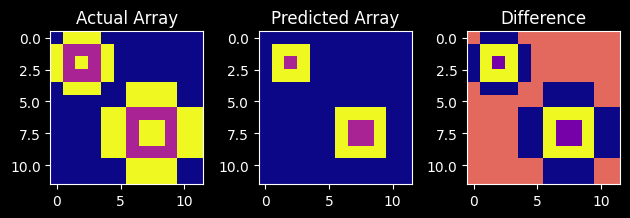

Training:  15%|█▌        | 3/20 [05:18<29:43, 104.91s/it]

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: eb929d92-b117-4ea3-824b-87b4f98e8038
Delete of nonexisting embedding ID: 8c7871cc-5f9a-4356-9036-680d6a399311
Delete of nonexisting embedding ID: 21355f9c-7684-42c6-a382-49bd57d2a869
Delete of nonexisting embedding ID: 7f6f776c-af88-4fe4-8462-d85ec19d8b28
Delete of nonexisting embedding ID: 51b5a213-cab3-4f61-b947-2125a9007a20
Delete of nonexisting embedding ID: ae7ee1e8-2c13-4339-8c93-9f7649877379
Delete of nonexisting embedding ID: ef6052e3-8fd4-4f6f-8388-42d21650c43c
Delete of nonexisting embedding ID: 9f2df322-4aa2-4bc1-9c44-7dbc264b92f9
Delete of nonexisting embedding ID: 7b067c95-ad8b-4ab6-9fe5-f4406181f3b2
Delete of nonexisting embedding ID: cda40735-58e0-40f0-9173-4420670b738f
Delete of nonexisting embedding ID: 3dbaff9a-7d44-4d63-b8b0-b232a2358c96
Delete of nonexisting embedding ID: f0731619-3640-402f-be56-2985ab03dfb6
Delete of nonexisting embedding ID: 688cbbdd-6fb2-4a0b-886f-0d359f8ce7b8
Delete of nonexisting embedding ID: 6d4717c6-21a9-4

Pruned 15 old entries and added 4 new entries.
Response is not parsable
DTW Score: 0.0


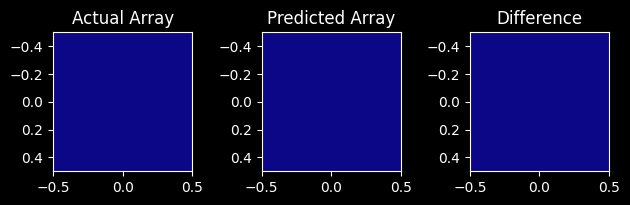

Training:  20%|██        | 4/20 [06:21<23:35, 88.45s/it] 

Pruned 15 old entries and added 9 new entries.


Delete of nonexisting embedding ID: f7df2015-455d-4f43-8577-2b843b29a7d3
Delete of nonexisting embedding ID: 718bfcd7-6f21-4831-9b97-e03275b346c0
Delete of nonexisting embedding ID: 0c604475-bcd0-4ddf-a595-306a59d05d4d
Delete of nonexisting embedding ID: cc4a6f65-50a8-4802-b3e6-af3abe96954b
Delete of nonexisting embedding ID: 44544971-3169-45d1-a231-d685eb4547a5
Delete of nonexisting embedding ID: e83548cf-44e6-47a3-8fc2-af62afa09be0
Delete of nonexisting embedding ID: 4235c593-cd36-4b83-ad1c-0fd1f6836357
Delete of nonexisting embedding ID: bdf1cfdc-4841-404b-801e-1b3ec91559ff
Delete of nonexisting embedding ID: ed202936-9e8c-4395-acb9-ec82289f65e8
Delete of nonexisting embedding ID: 9794b8bb-def6-4d37-af0c-f1b14bd810bf
Delete of nonexisting embedding ID: f7df2015-455d-4f43-8577-2b843b29a7d3
Delete of nonexisting embedding ID: 718bfcd7-6f21-4831-9b97-e03275b346c0
Delete of nonexisting embedding ID: 0c604475-bcd0-4ddf-a595-306a59d05d4d
Delete of nonexisting embedding ID: cc4a6f65-50a8-4

Pruned 15 old entries and added 6 new entries.
Response is not parsable
DTW Score: 0.0


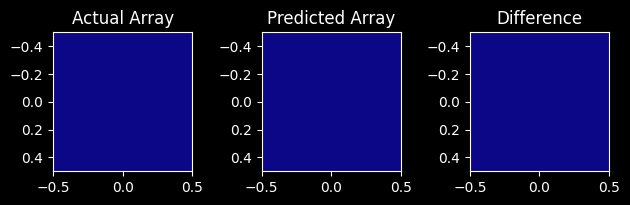

Training:  25%|██▌       | 5/20 [07:46<21:45, 87.04s/it]

Pruned 15 old entries and added 10 new entries.


Delete of nonexisting embedding ID: 3d20fdb5-c0c6-4f04-ba97-71d8573ed43a
Delete of nonexisting embedding ID: 4918f363-d76c-4daf-b53a-766439a0032a
Delete of nonexisting embedding ID: f552470c-c56b-47f1-8f91-35100fe30718
Delete of nonexisting embedding ID: 188ee43a-c7ee-45ef-ad39-aa69669ee417
Delete of nonexisting embedding ID: 93581a22-f45c-4bf0-9731-06742835c3a3
Delete of nonexisting embedding ID: 9482597c-4ec4-4b0b-8a49-5732e3b79066
Delete of nonexisting embedding ID: c3fc77f7-1e39-4b80-b03e-7ceede3a3708
Delete of nonexisting embedding ID: f09e4a9a-139e-4a49-848e-98d6975bd744
Delete of nonexisting embedding ID: 109b653c-feb6-4cc2-9512-4ceac63a09e6
Delete of nonexisting embedding ID: 3dffc6c4-1db1-47a6-a95c-bbd0696d3338
Delete of nonexisting embedding ID: 51f13bae-30f6-4e11-a351-0e9e8f17e940
Delete of nonexisting embedding ID: 3d20fdb5-c0c6-4f04-ba97-71d8573ed43a
Delete of nonexisting embedding ID: 4918f363-d76c-4daf-b53a-766439a0032a
Delete of nonexisting embedding ID: f552470c-c56b-4

Pruned 15 old entries and added 5 new entries.
DTW Score: 26.267851073127396


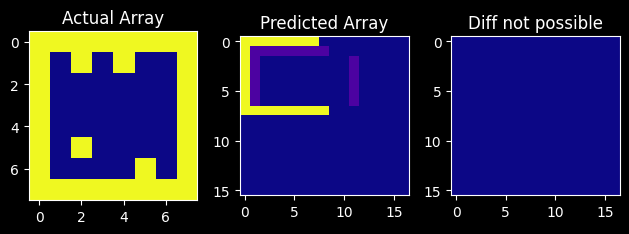

Training:  30%|███       | 6/20 [11:00<28:50, 123.63s/it]

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: dcc580ba-bea7-4318-bbb4-fcd97baa991d
Delete of nonexisting embedding ID: 8ba2d907-7fd4-4c75-88b1-3c4cb7ce0367
Delete of nonexisting embedding ID: 60584ddd-170c-494c-94f0-fc60a3be26b6
Delete of nonexisting embedding ID: 9698b5d0-d1b9-40ee-956e-fa8cbfeea50a
Delete of nonexisting embedding ID: 43e75c4d-4238-4feb-90c3-a97697961ffa
Delete of nonexisting embedding ID: 2657cd61-b327-4190-9c0d-68d18f116f84
Delete of nonexisting embedding ID: 2e8e5cb5-c68c-4da7-8205-83cea1edf917
Delete of nonexisting embedding ID: dd5644a0-41b2-412d-acdd-780b9d0412a5
Delete of nonexisting embedding ID: 909d8457-e2fd-471c-84b9-641e45956665
Delete of nonexisting embedding ID: 6e82da17-f714-4532-ba40-3a1743b236a4
Delete of nonexisting embedding ID: fcec57c7-7cba-4a62-ab26-9be228d774ec
Delete of nonexisting embedding ID: b0609bb0-7204-4c05-8408-46e7b36a692a
Delete of nonexisting embedding ID: 0b4a319e-35f1-4683-8031-861c0b14aa36
Delete of nonexisting embedding ID: dcc580ba-bea7-4

Pruned 15 old entries and added 5 new entries.
DTW Score: 13.379088160259652


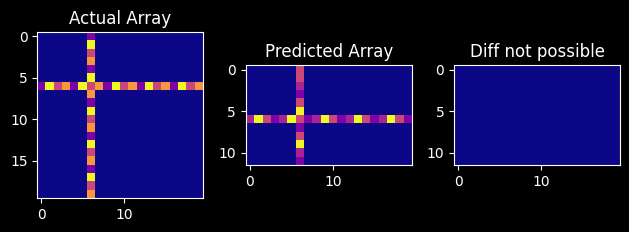

Training:  35%|███▌      | 7/20 [12:22<23:49, 109.96s/it]

Pruned 15 old entries and added 10 new entries.


Delete of nonexisting embedding ID: 4e098a77-442a-46ec-9b1c-a9c72579a22f
Delete of nonexisting embedding ID: f1810041-7bb1-4b63-b0c8-ea98d6ccc0b9
Delete of nonexisting embedding ID: 77f70add-57b6-430e-93e0-589b3ac61774
Delete of nonexisting embedding ID: 19acec9a-cd26-4b46-8597-0875b8d93b32
Delete of nonexisting embedding ID: bd8806f1-05aa-45e6-977b-a7ba48e05c6c
Delete of nonexisting embedding ID: f88035a2-736b-4e30-a55b-bb2d49be57a2
Delete of nonexisting embedding ID: c2b6b997-d715-4cd2-ae0a-6ef4ab21a1b5
Delete of nonexisting embedding ID: 8a4dc8c3-93f2-4e18-a549-235f9ccf9964
Delete of nonexisting embedding ID: d449f755-05bd-413e-85f1-286e7774a538
Delete of nonexisting embedding ID: 7d1bd8c3-6c96-4f25-8a80-1a11bd8ebbb3
Delete of nonexisting embedding ID: 88c9570b-0ce0-4eda-9bd2-0cea7672cd3b
Delete of nonexisting embedding ID: 4e098a77-442a-46ec-9b1c-a9c72579a22f
Delete of nonexisting embedding ID: f1810041-7bb1-4b63-b0c8-ea98d6ccc0b9
Delete of nonexisting embedding ID: 77f70add-57b6-4

Pruned 15 old entries and added 5 new entries.
Response is not parsable
DTW Score: 0.0


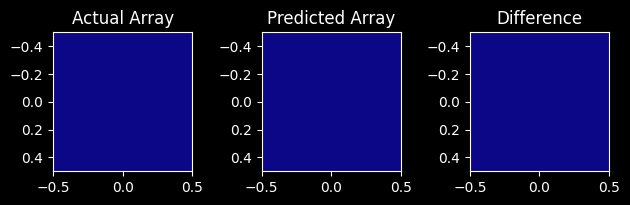

Training:  40%|████      | 8/20 [13:40<19:57, 99.75s/it] 

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: 268324f2-fbdd-461b-84c4-0fc82431c627
Delete of nonexisting embedding ID: 96f0aab8-d3b4-43ac-a408-0bccbf4dd7e4
Delete of nonexisting embedding ID: b0d0ea49-45fe-4c12-88ed-b7dc1f6eae2d
Delete of nonexisting embedding ID: e6d45180-782b-400f-a20a-1ad546dbaba8
Delete of nonexisting embedding ID: 88e2bfc5-71e7-4564-9110-1389b413ca86
Delete of nonexisting embedding ID: f4c4234f-26d2-462d-8fed-2e47aaea3ee9
Delete of nonexisting embedding ID: 1765f62b-8d8f-40c3-be22-9f7a0d2da55c
Delete of nonexisting embedding ID: c3c0405f-3b65-4776-a2f8-2c394f3ea449
Delete of nonexisting embedding ID: 0eb66945-869a-43e5-9d28-c21372cfb231
Delete of nonexisting embedding ID: 5e40bfbd-8057-486d-9a84-e486d163ac68
Delete of nonexisting embedding ID: f1b17855-7cce-4828-845b-93a6c5d96b13
Delete of nonexisting embedding ID: e18a8680-952f-4241-a5cb-201f5e3c1a07
Delete of nonexisting embedding ID: b8ddd005-0993-48cf-87d1-8e49d53d6fcf
Delete of nonexisting embedding ID: 268324f2-fbdd-4

Pruned 15 old entries and added 4 new entries.
Response is not parsable
DTW Score: 0.0


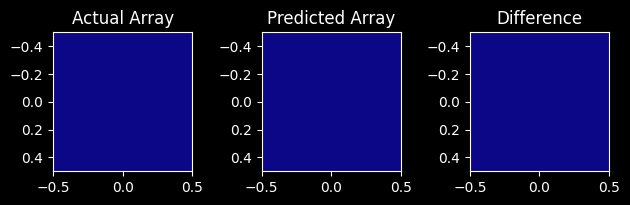

Training:  45%|████▌     | 9/20 [16:08<21:04, 114.97s/it]

Pruned 15 old entries and added 6 new entries.


Delete of nonexisting embedding ID: 3e987370-32b6-400f-a3a3-4870a107cbf6
Delete of nonexisting embedding ID: fa081a9c-ae5b-4802-acb1-490d860145f7
Delete of nonexisting embedding ID: 7dda0ea2-00f5-4138-ae29-38d0d11530e4
Delete of nonexisting embedding ID: 236f4835-f45b-45ed-a531-f1eb5acccf17
Delete of nonexisting embedding ID: e47c3fcf-db93-460a-b481-04ba378d3137
Delete of nonexisting embedding ID: 0461c68f-d044-44d9-9982-f2ec573143b0
Delete of nonexisting embedding ID: 7fce727e-84ba-4bd9-ba4a-9a1f49f6f441
Delete of nonexisting embedding ID: 2fd2eaf4-5544-487d-ad78-8ce24207ec75
Delete of nonexisting embedding ID: 635a2b39-1a95-499d-861d-d8718ca25f99
Delete of nonexisting embedding ID: d824f7f5-7227-49c0-b326-9403b0424740
Delete of nonexisting embedding ID: c85379ea-76f5-4942-a63f-4255d06558f0
Delete of nonexisting embedding ID: 3e987370-32b6-400f-a3a3-4870a107cbf6
Delete of nonexisting embedding ID: fa081a9c-ae5b-4802-acb1-490d860145f7
Delete of nonexisting embedding ID: 7dda0ea2-00f5-4

Pruned 15 old entries and added 5 new entries.
Response is not parsable
DTW Score: 0.0


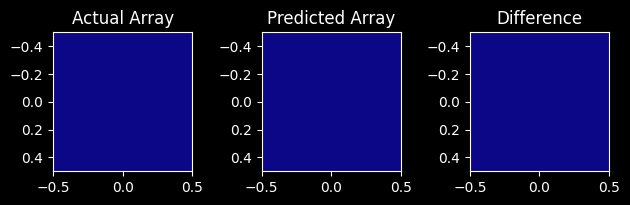

Training:  50%|█████     | 10/20 [17:32<17:34, 105.40s/it]

Pruned 15 old entries and added 6 new entries.


Delete of nonexisting embedding ID: 3fef9657-18d7-4864-af7b-ab3eccccfd37
Delete of nonexisting embedding ID: 1417436c-83f4-4111-9394-2c6784528a78
Delete of nonexisting embedding ID: 5cf606bb-9157-4494-ba42-fad0cf40aaf2
Delete of nonexisting embedding ID: 15f0cadf-3360-477a-9269-4519d57d74b3
Delete of nonexisting embedding ID: 0a91f854-e4fe-4aad-b332-8087e3957e39
Delete of nonexisting embedding ID: ab4bf08a-381e-4fca-b083-c1d0233881aa
Delete of nonexisting embedding ID: 011ec372-14a3-4564-8894-746aed8296bf
Delete of nonexisting embedding ID: 7acf7d64-efeb-4e55-8bb0-2f19b146e5da
Delete of nonexisting embedding ID: b30a6025-c46c-4601-a101-049e41ccb799
Delete of nonexisting embedding ID: d63c846d-bf7c-46ed-b4ac-884ab78ac1ed
Delete of nonexisting embedding ID: e243dc7b-9037-45fd-aeb7-45e4395ddc00
Delete of nonexisting embedding ID: cbc9285c-65d4-4e25-9930-1a690e8e7894
Delete of nonexisting embedding ID: 7d594810-bda7-4420-9b80-fcdac2d60bed
Delete of nonexisting embedding ID: 718abfdc-2ff6-4

Pruned 15 old entries and added 5 new entries.
DTW Score: 22.627416997969522


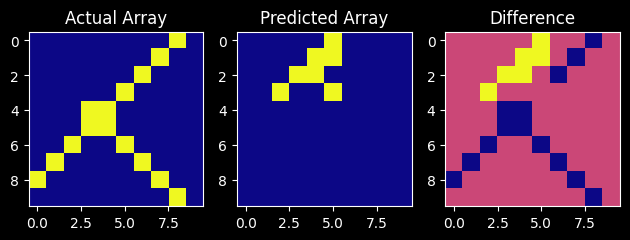

Training:  55%|█████▌    | 11/20 [18:39<14:00, 93.39s/it] 

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: 743684f5-f769-4ae5-97a8-33c8ade7099f
Delete of nonexisting embedding ID: defa47ae-59ec-492e-addd-e493f233ee4d
Delete of nonexisting embedding ID: 4409062f-4497-4ce8-962f-63453dd4f24c
Delete of nonexisting embedding ID: 71d29190-0c7c-4738-b76f-7c3ca85e9afc
Delete of nonexisting embedding ID: 67e14cf6-59de-4c48-8490-940b60e98bc6
Delete of nonexisting embedding ID: 62709251-3c7f-4400-8eb6-e27b1ad477ce
Delete of nonexisting embedding ID: f67f56f3-11bf-434a-b79c-01419a8a317c
Delete of nonexisting embedding ID: f54880f2-e635-4ee3-8a32-ac6feed1f816
Delete of nonexisting embedding ID: 94b29cfb-6be2-4f15-b3c9-c90d3e4b46aa
Delete of nonexisting embedding ID: 052e5154-f6ae-4a65-8a67-d45de757f1fe
Delete of nonexisting embedding ID: 48689b17-ead0-437e-a868-ff15ea936b48
Delete of nonexisting embedding ID: 3a462445-70a3-4441-b9d6-6562bf4c1084
Delete of nonexisting embedding ID: 7f4b3fba-9c06-4f17-b764-4a9f0d2c2d29
Delete of nonexisting embedding ID: 743684f5-f769-4

Pruned 15 old entries and added 5 new entries.
Response is not parsable
DTW Score: 0.0


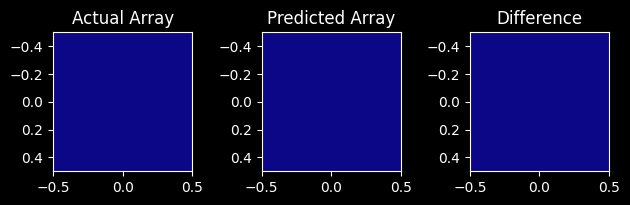

Training:  60%|██████    | 12/20 [19:57<11:49, 88.69s/it]

Pruned 15 old entries and added 8 new entries.


Delete of nonexisting embedding ID: 4ad058b1-c165-4885-aa2c-eb133f70ed44
Delete of nonexisting embedding ID: d782890f-7ccc-46bb-a6b9-3b0784df1209
Delete of nonexisting embedding ID: 69190082-6007-4c95-9eac-0dcb50cd3ff2
Delete of nonexisting embedding ID: 12be84fb-de08-4d88-a758-abb191a96d84
Delete of nonexisting embedding ID: 87fa73fd-e713-4e1b-bf0a-ae5363b4649c
Delete of nonexisting embedding ID: cbaea604-d2db-4cea-9a74-a837587321a2
Delete of nonexisting embedding ID: d041a95f-76ed-45e6-b1c0-335c4ed36e19
Delete of nonexisting embedding ID: 9547e80e-4ce0-4395-920c-38d36de5c4b0
Delete of nonexisting embedding ID: 68348438-40fb-4cdc-bc21-24e71ea57ff1
Delete of nonexisting embedding ID: 0221a382-7227-4cb3-a079-e71460b0cb11
Delete of nonexisting embedding ID: dfecdef7-799b-4357-bb58-947d31ad342d
Delete of nonexisting embedding ID: 4ac4b762-42b4-4df5-8ebc-65a9528cdd3a
Delete of nonexisting embedding ID: 4ad058b1-c165-4885-aa2c-eb133f70ed44
Delete of nonexisting embedding ID: d782890f-7ccc-4

Pruned 15 old entries and added 4 new entries.
Response is not parsable
DTW Score: 0.0


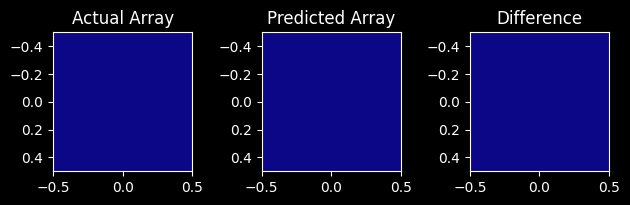

Training:  65%|██████▌   | 13/20 [21:11<09:50, 84.37s/it]

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: 1e424b1b-493f-412e-8bdf-47dca761b6ca
Delete of nonexisting embedding ID: 89b9e352-6f32-41dd-9e27-04ded1487ad8
Delete of nonexisting embedding ID: ba474075-6b69-4221-b827-06c6b604f272
Delete of nonexisting embedding ID: c063329a-dac5-4204-9014-907ea4ec7396
Delete of nonexisting embedding ID: db5eaa19-94ee-4ba2-b7f8-ed0b70aa3c0d
Delete of nonexisting embedding ID: 6bfddff4-46ba-4ab9-a413-a96af92c775f
Delete of nonexisting embedding ID: 6d6181e4-a268-4649-a185-f3ca75b3e511
Delete of nonexisting embedding ID: 98942fb3-4dda-4173-9022-58dda377a152
Delete of nonexisting embedding ID: e6d90893-c4ff-486c-bbe4-1b6bb950486f
Delete of nonexisting embedding ID: a7c6c766-7621-4cab-8129-2718ad5de075
Delete of nonexisting embedding ID: a2651bf4-ff17-40f2-809e-dc6d41c54aef
Delete of nonexisting embedding ID: 040d7a08-e142-4f9f-a06d-176bbfc62672
Delete of nonexisting embedding ID: 9b71977e-dcbf-4b94-ba4f-9e242dc6dd7e
Delete of nonexisting embedding ID: 1e424b1b-493f-4

Pruned 15 old entries and added 3 new entries.
DTW Score: 14.798648586948742


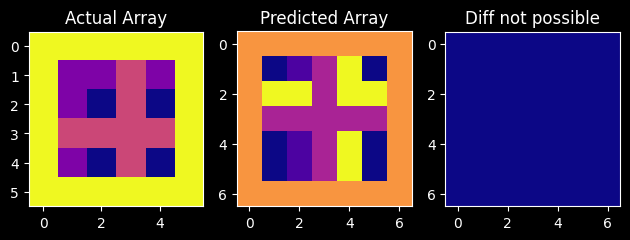

Training:  70%|███████   | 14/20 [22:19<07:56, 79.41s/it]

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: e1ec9676-13fd-4d13-b00b-c0030494b917
Delete of nonexisting embedding ID: ff8e41f5-0539-46e3-8e41-e2a86a72a27e
Delete of nonexisting embedding ID: 41340f16-582e-49b0-90dd-888f8967bd90
Delete of nonexisting embedding ID: 97c7339b-2a4a-41f7-8fe0-242d135c9b2e
Delete of nonexisting embedding ID: 86201f8c-710e-456c-b080-b52aabcb151a
Delete of nonexisting embedding ID: ad6df3b3-2234-459e-892f-2db52fd2366b
Delete of nonexisting embedding ID: be7119f6-8572-4956-a4a2-f1184e2c8435
Delete of nonexisting embedding ID: 35f65541-cfc0-4bf4-937c-2b27fdeb4387
Delete of nonexisting embedding ID: b5d642ab-81dc-4f7e-be72-130947e6694d
Delete of nonexisting embedding ID: dff6413f-7eea-4185-8b03-3b3c020eb90c
Delete of nonexisting embedding ID: 6bdbd5db-0816-490d-b1a0-a4b12e671288
Delete of nonexisting embedding ID: e1ec9676-13fd-4d13-b00b-c0030494b917
Delete of nonexisting embedding ID: ff8e41f5-0539-46e3-8e41-e2a86a72a27e
Delete of nonexisting embedding ID: 41340f16-582e-4

Pruned 15 old entries and added 4 new entries.
Response is not parsable
DTW Score: 0.0


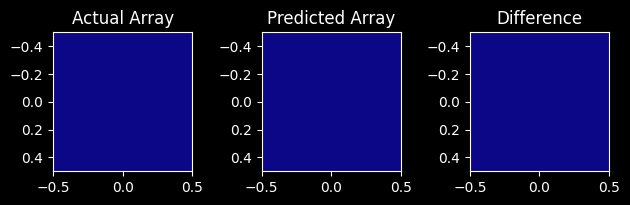

Training:  75%|███████▌  | 15/20 [24:13<07:29, 89.96s/it]

Pruned 15 old entries and added 7 new entries.


Delete of nonexisting embedding ID: 3b2c4755-184a-4878-99e0-2bc721dcb20e
Delete of nonexisting embedding ID: 36b4600b-be5f-4bea-a16f-66b3ea1c5e78
Delete of nonexisting embedding ID: 8fd68796-41c6-4ac2-b636-34e73794685e
Delete of nonexisting embedding ID: e53ca3cd-aa40-4034-9ecf-80b926c4cbbd
Delete of nonexisting embedding ID: 9f811414-76dd-4a2a-9fe5-5e76133242dc
Delete of nonexisting embedding ID: 05cae2c9-d75e-4dd3-a4b8-0077136287ca
Delete of nonexisting embedding ID: a1a45cd7-2843-4397-9dd6-54c6e4c3dba0
Delete of nonexisting embedding ID: 152b9155-12ea-46c7-a634-82a2a3923976
Delete of nonexisting embedding ID: 57f93905-ce60-4b70-8d5e-33b0ec6a352f
Delete of nonexisting embedding ID: 6cdeca82-e830-439a-81c0-48cbf13e62d2
Delete of nonexisting embedding ID: 0800cecd-a174-4228-a017-7b8dffb7f5aa
Delete of nonexisting embedding ID: 6369025c-81fb-44f1-9c67-7e7eab45f2be
Delete of nonexisting embedding ID: 3b2c4755-184a-4878-99e0-2bc721dcb20e
Delete of nonexisting embedding ID: 36b4600b-be5f-4

Pruned 15 old entries and added 3 new entries.
Response is not parsable
DTW Score: 0.0


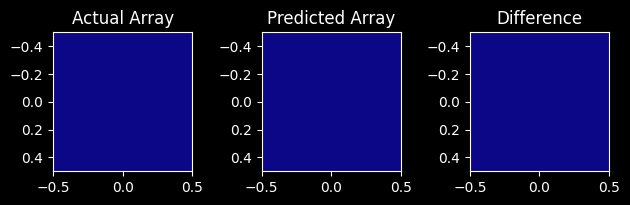

Training:  80%|████████  | 16/20 [26:45<07:13, 108.49s/it]

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: 43f9e607-1297-4ecc-9520-cfa4113cc5b0
Delete of nonexisting embedding ID: 0db7d929-6f91-405d-8c41-b5c75437c67b
Delete of nonexisting embedding ID: 6a71f9cd-835c-424a-99d1-6cea63c96942
Delete of nonexisting embedding ID: 283011b1-495c-4558-bfbb-864b6a479fd8
Delete of nonexisting embedding ID: 1c4fd02c-f332-43e6-ae66-2a4ae45cec6a
Delete of nonexisting embedding ID: f6e47a79-3351-4b20-9fab-4122de575f71
Delete of nonexisting embedding ID: 7c4c7b6a-2121-42d7-9777-0e3d78fcb97b
Delete of nonexisting embedding ID: ddf087db-9cf0-4777-a3f1-f585eb39ed45
Delete of nonexisting embedding ID: 160b63e1-5636-417f-abd1-424bf533ad52
Delete of nonexisting embedding ID: b0b8ad62-7750-415d-b427-87aca76e71c3
Delete of nonexisting embedding ID: 64ac5ec7-6343-4768-b83a-0661f6a4b05a
Delete of nonexisting embedding ID: d7dd7649-7ef2-4e40-9294-675c4daa0f14
Delete of nonexisting embedding ID: 2dcb454c-df2c-4f64-ba64-b9071e179f14
Delete of nonexisting embedding ID: 43f9e607-1297-4

Pruned 15 old entries and added 4 new entries.
DTW Score: 16.46207763315433


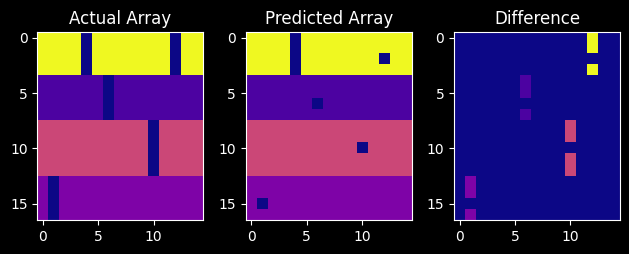

Training:  85%|████████▌ | 17/20 [29:45<06:30, 130.08s/it]

Pruned 15 old entries and added 10 new entries.


Delete of nonexisting embedding ID: bb170a9b-ceb5-46f2-9ea7-9f66aec73b59
Delete of nonexisting embedding ID: e95d17f4-5c0a-40cf-9330-18e268439b8e
Delete of nonexisting embedding ID: fca3f15f-9703-46dc-ad8f-413ee5e61611
Delete of nonexisting embedding ID: 0c2f3594-bec9-4297-b31a-76a487c921dc
Delete of nonexisting embedding ID: 70b5eb45-8586-480e-b504-ba09b31e045e
Delete of nonexisting embedding ID: 181d374f-1802-4c3d-846e-8b95ab86670b
Delete of nonexisting embedding ID: 6b06aff6-47e8-4adb-8875-872e463133ef
Delete of nonexisting embedding ID: 758179ed-df0b-4b6a-a922-ccfd4b636653
Delete of nonexisting embedding ID: e03a8a3b-4493-4117-98a5-c97b95d8c7f4
Delete of nonexisting embedding ID: 7854dedc-7861-48fd-bdfa-5ca5e008714b
Delete of nonexisting embedding ID: a5723d43-2a8c-4346-be83-bdf35a6929c2
Delete of nonexisting embedding ID: fe3d2e6e-4574-459e-89b9-dec629d64b72
Delete of nonexisting embedding ID: b390721b-9899-4ad0-99b1-16eecd31af3a
Delete of nonexisting embedding ID: bb170a9b-ceb5-4

Pruned 15 old entries and added 4 new entries.
DTW Score: 24.372115213907882


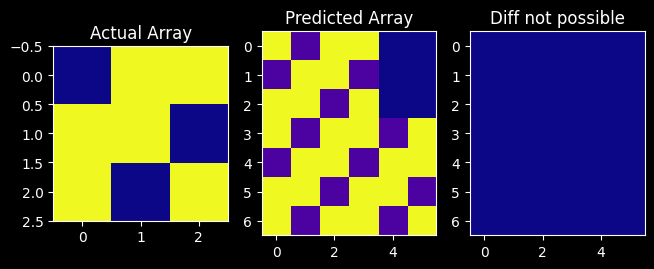

Training:  90%|█████████ | 18/20 [31:48<04:15, 127.83s/it]

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: 11c4e97b-8e3f-46d8-99cf-8807a7158e3e
Delete of nonexisting embedding ID: 784450d6-7404-4417-acc4-7ce16329dde4
Delete of nonexisting embedding ID: 1d4d1f20-0707-4e1d-a957-54d05938885a
Delete of nonexisting embedding ID: 81065ef2-d060-4d2b-9b74-a0c455d5f99f
Delete of nonexisting embedding ID: 8c348fc1-3ac6-412a-9d5d-d4401ec75cf4
Delete of nonexisting embedding ID: f6dd5b18-5f9b-41c9-ab82-e6c8e14c5549
Delete of nonexisting embedding ID: 7b5b8402-6868-4bdb-966f-a1d4f27a79fd
Delete of nonexisting embedding ID: 6a1f238b-7d1c-4dd0-a85a-7f934b1f8b40
Delete of nonexisting embedding ID: e92cd654-a9b6-4239-87a6-577bd4c94dd2
Delete of nonexisting embedding ID: ac7bd2f4-913b-4eca-8739-0ff873f21c09
Delete of nonexisting embedding ID: e8a80293-ba92-470c-8851-5da019dea8a4
Delete of nonexisting embedding ID: adcb54b0-0bd8-4866-bdbd-d77a44c4c320
Delete of nonexisting embedding ID: 9265594f-f076-4dcf-8c82-859d22dff55d
Delete of nonexisting embedding ID: 11c4e97b-8e3f-4

Pruned 15 old entries and added 3 new entries.
DTW Score: 32.0


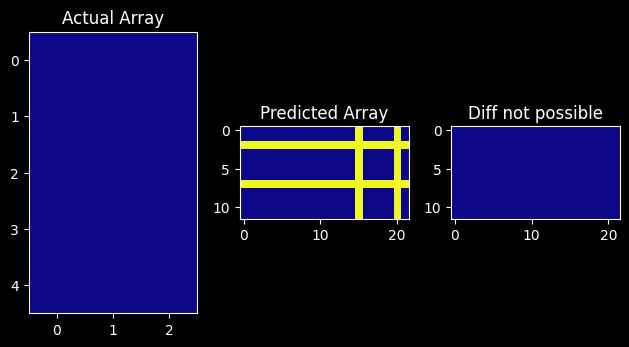

Training:  95%|█████████▌| 19/20 [34:41<02:21, 141.58s/it]

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: 00a2f883-f523-4020-bde6-eb5c4c4f019e
Delete of nonexisting embedding ID: a11a2dad-8d37-4bdc-ab53-4e54f364c82a
Delete of nonexisting embedding ID: d8569dbc-201d-4200-a581-d062cb0d8d0c
Delete of nonexisting embedding ID: 019a5590-126b-499e-832a-e78733cacd36
Delete of nonexisting embedding ID: dbb8ccf9-c213-48d2-aa80-7a5c67c6b5f2
Delete of nonexisting embedding ID: d2db4c0f-387c-4cb4-a6e3-5de5e3e80573
Delete of nonexisting embedding ID: ddc3fc37-1534-4a96-a5ea-afea988c836d
Delete of nonexisting embedding ID: 86130b52-c9ae-4275-ac0c-c0adc4ebd90d
Delete of nonexisting embedding ID: 816857b3-2335-472a-a7f5-9e3a15bccb44
Delete of nonexisting embedding ID: c186c2b5-2ba1-4418-9af8-6493f9860298
Delete of nonexisting embedding ID: 2debb770-b1ba-422a-9d39-a40cbd9c9d60
Delete of nonexisting embedding ID: 00a2f883-f523-4020-bde6-eb5c4c4f019e
Delete of nonexisting embedding ID: a11a2dad-8d37-4bdc-ab53-4e54f364c82a
Delete of nonexisting embedding ID: d8569dbc-201d-4

Pruned 15 old entries and added 5 new entries.
Response is not parsable
DTW Score: 0.0


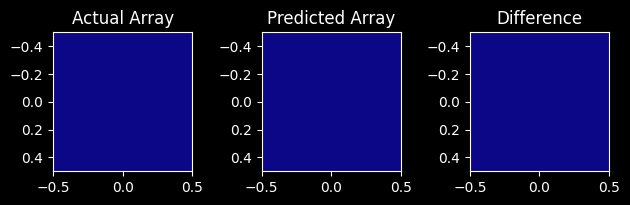

Training: 100%|██████████| 20/20 [35:43<00:00, 107.19s/it]



Epoch 1 Train Accuracy: 0.00% (0/20) 🎓



Testing: 0it [00:00, ?it/s]


Epoch 1 Test Accuracy: 0.00% (0/0) 🧪



In [7]:
from train_test_helper import train_and_evaluate

from logical_agents import logic_concept_reasoning_network

reasoning_iterations=4
reasoning_agent=lambda prompt,input: logic_concept_reasoning_network(f"{prompt}\n{input}", max_iterations=reasoning_iterations)

set_live_verbosity(0)

n = 20 # 10 + 20
import random

selected_data = random.sample(data, n)

results, train_dtw_scores, test_dtw_scores=train_and_evaluate(
    dataset=selected_data,  
    mlu=mlu,
    prompt_key="query",
    response_key="reply",
    epochs=1,
    test_size=0,
    train_batch_size=1,
    test_batch_size=1,
    initial_serial_items=1,
    logging=True,
    training_analysis_agent = reasoning_agent,
    testing_analysis_agent = reasoning_agent,
)

In [8]:
print(train_dtw_scores, test_dtw_scores)

[26.68332812825267, [10.723805294763608], [26.90724809414742], [0.0], [0.0], [26.267851073127396], [13.379088160259652], [0.0], [0.0], [0.0], [22.627416997969522], [0.0], [0.0], [14.798648586948742], [0.0], [0.0], [16.46207763315433], [24.372115213907882], [32.0], [0.0]] []


In [ ]:
#[0.0, [0.0], [0.0], [9.539392014169456], [0.0], [17.776388834631177], [2.0], [3.0], [0.0], [0.0]] []